In [ ]:
!pip install datasets
from datasets import load_dataset

# Load the XSum dataset
xsum_dataset = load_dataset("xsum")
xsum_test = xsum_dataset['test']

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for xsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/xsum
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [ ]:
##Get Log-likelihood
import torch
tokenizer_ll = AutoTokenizer.from_pretrained("gpt2")
model_ll = AutoModelForCausalLM.from_pretrained("gpt2")
def get_log_likelihood(text):
  with torch.no_grad():
      tokenized = tokenizer_ll(text, return_tensors="pt")
      labels = tokenized.input_ids
      ll = -model_ll(**tokenized, labels=labels).loss.item()
      return ll




In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM

# Load tokenizer and model
generate_tokenizer = AutoTokenizer.from_pretrained("gpt2")
generate_model = AutoModelForCausalLM.from_pretrained("gpt2")

def generate_text(text):
  # Define your prompt

  prompt = " ".join(text.split()[:30])
  # Tokenize the prompt
  inputs = generate_tokenizer(prompt, return_tensors="pt")

  # Generate text
  output = generate_model.generate(
      inputs.input_ids,
      max_length=300,  # Adjust the length as needed
      temperature=0.7,  # Adjust the temperature for more or less randomness
      top_k=50,  # Adjust for diversity
      top_p=0.95,  # Adjust for diversity
      do_sample=True,
      num_return_sequences=1  # Number of sequences to generate
  )

  # Decode the generated output
  generated_text = generate_tokenizer.decode(output[0], skip_special_tokens=True)
  return generated_text


In [ ]:
import random

def mask_text(text, mask_percentage):
    # Tokenize the text into words
    words = text.split()

    # Calculate the number of two-word samples to mask
    num_samples_to_mask = int(len(words) * mask_percentage / 2)

    # Create a copy of the words list to avoid modifying the original text
    masked_text = words.copy()

    # Generate indices of two-word samples to mask
    indices_to_mask = random.sample(range(len(words) - 1), num_samples_to_mask)

    # Mask out the selected two-word samples
    for index in indices_to_mask:
        masked_text[index] = "[MASK]"
        masked_text[index + 1] = "[MASK]"

    # Join the masked words back into a sentence
    masked_sentence = " ".join(masked_text)

    return masked_sentence

# Example text
#text = "Prison Link Cymru had 1,099 referrals in 2015-16 and said some ex-offenders were living rough for up to a year before finding suitable accommodation. Workers at the charity claim investment."


In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForMaskedLM
# Load tokenizer and model for masked language modeling
masked_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
masked_model = AutoModelForMaskedLM.from_pretrained("bert-base-uncased")

def generate_filled_text(masked_text):


    # Tokenize the masked text
    tokenized_text = masked_tokenizer(masked_text, return_tensors="pt")

    # Mask filling pipeline
    fill_mask = pipeline("fill-mask", model=masked_model, tokenizer=masked_tokenizer)

    # Generate predictions for masked tokens
    filled_text = masked_text
    for prediction in fill_mask(masked_text):
        filled_text = filled_text.replace("[MASK]", prediction[0]["token_str"], 1)

    return filled_text




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
human = []
ai = []
for i in range(100):

  text = xsum_test[i]['document']
  #Set to less than 512 tokens
  text = " ".join(text.split()[:350])

  masked_test_text = mask_text(text, 0.15)
  filled_test_text = generate_filled_text(masked_test_text)

  generated_text = generate_text(text)
  masked_generated_text = mask_text(generated_text, 0.15)
  filled_generated_text = generate_filled_text(masked_generated_text)



  humanscore = get_log_likelihood(text) - get_log_likelihood(filled_test_text)
  aiscore = get_log_likelihood(generated_text) - get_log_likelihood(filled_generated_text)

  human.append(humanscore)
  ai.append(aiscore)
  print(i)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


1


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


2


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


3


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


4


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


5


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


6


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


7


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


8


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


9


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


10


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


11


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


12


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


13


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


14


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


15


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


16


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


17


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


18


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


19


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


20


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


21


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


22


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


23


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


24


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


25


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


26


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


27


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


28


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


29


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


30


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


31


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


32


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


33


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


34


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


35


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


36


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


37


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


38


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


39


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


40


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


41


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


42


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


43


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


44


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


45


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


46


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


47


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


48


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


49


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


51


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


52


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


53


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


54


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


55


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


56


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


57


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


58


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


59


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


60


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


61


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


62


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


63


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


64


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


65


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


66


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


67


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


68


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


69


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


70


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


71


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


72


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


73


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


74


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


75


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


76


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


77


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


78


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


79


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


80


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


81


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


82


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


83


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


84


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


85


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


86


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


87


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


88


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


89


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


90


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


91


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


92


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


93


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


94


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


95


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


96


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


97


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


98


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


99


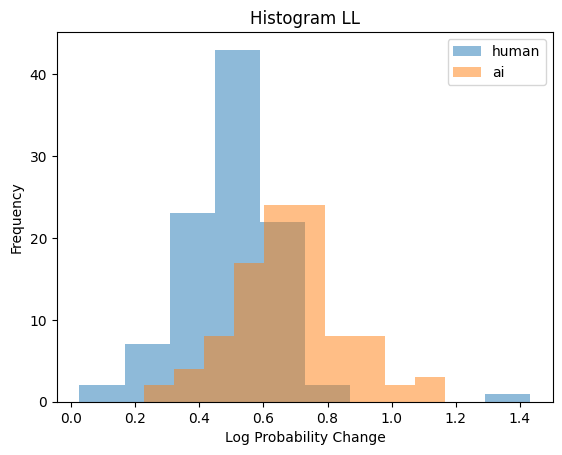

In [ ]:
import matplotlib.pyplot as plt

# Define the data


# Set the number of bins
num_bins = 10

# Create the histogram
plt.hist(human, bins=num_bins, alpha=0.5, label='human')
plt.hist(ai, bins=num_bins, alpha=0.5, label='ai')

# Add labels and title
plt.xlabel('Log Probability Change')
plt.ylabel('Frequency')
plt.title('Histogram LL')


# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
"""
---DetectGPT code snippet---

import matplotlib.pyplot as plt
import numpy as np
import datasets
import transformers
import re
import torch
import torch.nn.functional as F
import tqdm
import random
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import argparse
import datetime
import os
import json
import functools
import custom_datasets
from multiprocessing.pool import ThreadPool
import time







def tokenize_and_mask(text, span_length, pct, ceil_pct=False):
    tokens = text.split(' ')
    mask_string = '<<<mask>>>'

    n_spans = pct * len(tokens) / (span_length + args.buffer_size * 2)
    if ceil_pct:
        n_spans = np.ceil(n_spans)
    n_spans = int(n_spans)

    n_masks = 0
    while n_masks < n_spans:
        start = np.random.randint(0, len(tokens) - span_length)
        end = start + span_length
        search_start = max(0, start - args.buffer_size)
        search_end = min(len(tokens), end + args.buffer_size)
        if mask_string not in tokens[search_start:search_end]:
            tokens[start:end] = [mask_string]
            n_masks += 1

    # replace each occurrence of mask_string with <extra_id_NUM>, where NUM increments
    num_filled = 0
    for idx, token in enumerate(tokens):
        if token == mask_string:
            tokens[idx] = f'<extra_id_{num_filled}>'
            num_filled += 1
    assert num_filled == n_masks, f"num_filled {num_filled} != n_masks {n_masks}"
    text = ' '.join(tokens)
    return text


def count_masks(texts):
    return [len([x for x in text.split() if x.startswith("<extra_id_")]) for text in texts]


# replace each masked span with a sample from T5 mask_model
def replace_masks(texts):
    n_expected = count_masks(texts)
    stop_id = mask_tokenizer.encode(f"<extra_id_{max(n_expected)}>")[0]
    tokens = mask_tokenizer(texts, return_tensors="pt", padding=True).to(DEVICE)
    outputs = mask_model.generate(**tokens, max_length=150, do_sample=True, top_p=args.mask_top_p, num_return_sequences=1, eos_token_id=stop_id)
    return mask_tokenizer.batch_decode(outputs, skip_special_tokens=False)


def extract_fills(texts):
    # remove <pad> from beginning of each text
    texts = [x.replace("<pad>", "").replace("</s>", "").strip() for x in texts]

    # return the text in between each matched mask token
    extracted_fills = [pattern.split(x)[1:-1] for x in texts]

    # remove whitespace around each fill
    extracted_fills = [[y.strip() for y in x] for x in extracted_fills]

    return extracted_fills


def apply_extracted_fills(masked_texts, extracted_fills):
    # split masked text into tokens, only splitting on spaces (not newlines)
    tokens = [x.split(' ') for x in masked_texts]

    n_expected = count_masks(masked_texts)

    # replace each mask token with the corresponding fill
    for idx, (text, fills, n) in enumerate(zip(tokens, extracted_fills, n_expected)):
        if len(fills) < n:
            tokens[idx] = []
        else:
            for fill_idx in range(n):
                text[text.index(f"<extra_id_{fill_idx}>")] = fills[fill_idx]

    # join tokens back into text
    texts = [" ".join(x) for x in tokens]
    return texts


def perturb_texts_(texts, span_length, pct, ceil_pct=False):
    if not args.random_fills:
        masked_texts = [tokenize_and_mask(x, span_length, pct, ceil_pct) for x in texts]
        raw_fills = replace_masks(masked_texts)
        extracted_fills = extract_fills(raw_fills)
        perturbed_texts = apply_extracted_fills(masked_texts, extracted_fills)

        # Handle the fact that sometimes the model doesn't generate the right number of fills and we have to try again
        attempts = 1
        while '' in perturbed_texts:
            idxs = [idx for idx, x in enumerate(perturbed_texts) if x == '']
            print(f'WARNING: {len(idxs)} texts have no fills. Trying again [attempt {attempts}].')
            masked_texts = [tokenize_and_mask(x, span_length, pct, ceil_pct) for idx, x in enumerate(texts) if idx in idxs]
            raw_fills = replace_masks(masked_texts)
            extracted_fills = extract_fills(raw_fills)
            new_perturbed_texts = apply_extracted_fills(masked_texts, extracted_fills)
            for idx, x in zip(idxs, new_perturbed_texts):
                perturbed_texts[idx] = x
            attempts += 1
    else:
        if args.random_fills_tokens:
            # tokenize base_tokenizer
            tokens = base_tokenizer(texts, return_tensors="pt", padding=True).to(DEVICE)
            valid_tokens = tokens.input_ids != base_tokenizer.pad_token_id
            replace_pct = args.pct_words_masked * (args.span_length / (args.span_length + 2 * args.buffer_size))

            # replace replace_pct of input_ids with random tokens
            random_mask = torch.rand(tokens.input_ids.shape, device=DEVICE) < replace_pct
            random_mask &= valid_tokens
            random_tokens = torch.randint(0, base_tokenizer.vocab_size, (random_mask.sum(),), device=DEVICE)
            # while any of the random tokens are special tokens, replace them with random non-special tokens
            while any(base_tokenizer.decode(x) in base_tokenizer.all_special_tokens for x in random_tokens):
                random_tokens = torch.randint(0, base_tokenizer.vocab_size, (random_mask.sum(),), device=DEVICE)
            tokens.input_ids[random_mask] = random_tokens
            perturbed_texts = base_tokenizer.batch_decode(tokens.input_ids, skip_special_tokens=True)
        else:
            masked_texts = [tokenize_and_mask(x, span_length, pct, ceil_pct) for x in texts]
            perturbed_texts = masked_texts
            # replace each <extra_id_*> with args.span_length random words from FILL_DICTIONARY
            for idx, text in enumerate(perturbed_texts):
                filled_text = text
                for fill_idx in range(count_masks([text])[0]):
                    fill = random.sample(FILL_DICTIONARY, span_length)
                    filled_text = filled_text.replace(f"<extra_id_{fill_idx}>", " ".join(fill))
                assert count_masks([filled_text])[0] == 0, "Failed to replace all masks"
                perturbed_texts[idx] = filled_text

    return perturbed_texts


def perturb_texts(texts, span_length, pct, ceil_pct=False):
    chunk_size = args.chunk_size
    if '11b' in mask_filling_model_name:
        chunk_size //= 2

    outputs = []
    for i in tqdm.tqdm(range(0, len(texts), chunk_size), desc="Applying perturbations"):
        outputs.extend(perturb_texts_(texts[i:i + chunk_size], span_length, pct, ceil_pct=ceil_pct))
    return outputs


def drop_last_word(text):
    return ' '.join(text.split(' ')[:-1])


def _openai_sample(p):
    return p + r['choices'][0].text


# sample from base_model using ****only**** the first 30 tokens in each example as context
def sample_from_model(texts, min_words=55, prompt_tokens=30):
    # encode each text as a list of token ids
    if args.dataset == 'pubmed':
        texts = [t[:t.index(custom_datasets.SEPARATOR)] for t in texts]
        all_encoded = base_tokenizer(texts, return_tensors="pt", padding=True).to(DEVICE)
    else:
        all_encoded = base_tokenizer(texts, return_tensors="pt", padding=True).to(DEVICE)
        all_encoded = {key: value[:, :prompt_tokens] for key, value in all_encoded.items()}

    if args.openai_model:
        # decode the prefixes back into text
        prefixes = base_tokenizer.batch_decode(all_encoded['input_ids'], skip_special_tokens=True)
        pool = ThreadPool(args.batch_size)

        decoded = pool.map(_openai_sample, prefixes)
    else:
        decoded = ['' for _ in range(len(texts))]

        # sample from the model until we get a sample with at least min_words words for each example
        # this is an inefficient way to do this (since we regenerate for all inputs if just one is too short), but it works
        tries = 0
        while (m := min(len(x.split()) for x in decoded)) < min_words:
            if tries != 0:
                print()
                print(f"min words: {m}, needed {min_words}, regenerating (try {tries})")

            sampling_kwargs = {}
            if args.do_top_p:
                sampling_kwargs['top_p'] = args.top_p
            elif args.do_top_k:
                sampling_kwargs['top_k'] = args.top_k
            min_length = 50 if args.dataset in ['pubmed'] else 150
            outputs = base_model.generate(**all_encoded, min_length=min_length, max_length=200, do_sample=True, **sampling_kwargs, pad_token_id=base_tokenizer.eos_token_id, eos_token_id=base_tokenizer.eos_token_id)
            decoded = base_tokenizer.batch_decode(outputs, skip_special_tokens=True)
            tries += 1

    if args.openai_model:
        global API_TOKEN_COUNTER

        # count total number of tokens with GPT2_TOKENIZER
        total_tokens = sum(len(GPT2_TOKENIZER.encode(x)) for x in decoded)
        API_TOKEN_COUNTER += total_tokens

    return decoded


def get_likelihood(logits, labels):
    assert logits.shape[0] == 1
    assert labels.shape[0] == 1

    logits = logits.view(-1, logits.shape[-1])[:-1]
    labels = labels.view(-1)[1:]
    log_probs = torch.nn.functional.log_softmax(logits, dim=-1)
    log_likelihood = log_probs.gather(dim=-1, index=labels.unsqueeze(-1)).squeeze(-1)
    return log_likelihood.mean()


# Get the log likelihood of each text under the base_model
def get_ll(text):
    if args.openai_model:
        kwargs = { "engine": args.openai_model, "temperature": 0, "max_tokens": 0, "echo": True, "logprobs": 0}
        r = openai.Completion.create(prompt=f"<|endoftext|>{text}", **kwargs)
        result = r['choices'][0]
        tokens, logprobs = result["logprobs"]["tokens"][1:], result["logprobs"]["token_logprobs"][1:]

        assert len(tokens) == len(logprobs), f"Expected {len(tokens)} logprobs, got {len(logprobs)}"

        return np.mean(logprobs)
    else:
        with torch.no_grad():
            tokenized = base_tokenizer(text, return_tensors="pt").to(DEVICE)
            labels = tokenized.input_ids
            return -base_model(**tokenized, labels=labels).loss.item()


def get_lls(texts):
    if not args.openai_model:
        return [get_ll(text) for text in texts]
    else:
        global API_TOKEN_COUNTER

        # use GPT2_TOKENIZER to get total number of tokens
        total_tokens = sum(len(GPT2_TOKENIZER.encode(text)) for text in texts)
        API_TOKEN_COUNTER += total_tokens * 2  # multiply by two because OpenAI double-counts echo_prompt tokens

        pool = ThreadPool(args.batch_size)
        return pool.map(get_ll, texts)


# get the average rank of each observed token sorted by model likelihood
def get_rank(text, log=False):
    assert args.openai_model is None, "get_rank not implemented for OpenAI models"

    with torch.no_grad():
        tokenized = base_tokenizer(text, return_tensors="pt").to(DEVICE)
        logits = base_model(**tokenized).logits[:,:-1]
        labels = tokenized.input_ids[:,1:]

        # get rank of each label token in the model's likelihood ordering
        matches = (logits.argsort(-1, descending=True) == labels.unsqueeze(-1)).nonzero()

        assert matches.shape[1] == 3, f"Expected 3 dimensions in matches tensor, got {matches.shape}"

        ranks, timesteps = matches[:,-1], matches[:,-2]

        # make sure we got exactly one match for each timestep in the sequence
        assert (timesteps == torch.arange(len(timesteps)).to(timesteps.device)).all(), "Expected one match per timestep"

        ranks = ranks.float() + 1 # convert to 1-indexed rank
        if log:
            ranks = torch.log(ranks)

        return ranks.float().mean().item()


# get average entropy of each token in the text
def get_entropy(text):
    assert args.openai_model is None, "get_entropy not implemented for OpenAI models"

    with torch.no_grad():
        tokenized = base_tokenizer(text, return_tensors="pt").to(DEVICE)
        logits = base_model(**tokenized).logits[:,:-1]
        neg_entropy = F.softmax(logits, dim=-1) * F.log_softmax(logits, dim=-1)
        return -neg_entropy.sum(-1).mean().item()


"""